This notebook reads gamma-gamma coincidence data into machine learning classification algorithms to develop predictive models of uranium enrichment and visualize important features, trends, etc.

In [1]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import math as math
import seaborn as sns

In [2]:
cd /users/adam/Box Sync/HDF5_data/csvs

/Users/adam/Box Sync/HDF5_data/csvs


In [3]:
nat01 = pd.read_csv('natu_03_25.csv', header=None).as_matrix()
nat02 = pd.read_csv('natu_03_28.csv', header=None).as_matrix()
nat03 = pd.read_csv('natu_03_30.csv', header=None).as_matrix()
nat04 = pd.read_csv('natu_04_01.csv', header=None).as_matrix()
nat05 = pd.read_csv('natu_04_04.csv', header=None).as_matrix()
nat06 = pd.read_csv('natu_04_06.csv', header=None).as_matrix()
nat07 = pd.read_csv('natu_04_08.csv', header=None).as_matrix()
nat08 = pd.read_csv('natu_04_11.csv', header=None).as_matrix()
nat09 = pd.read_csv('natu_04_13.csv', header=None).as_matrix()
nat10 = pd.read_csv('natu_04_15.csv', header=None).as_matrix()
nat11 = pd.read_csv('natu_04_18.csv', header=None).as_matrix()
nat12 = pd.read_csv('natu_04_20.csv', header=None).as_matrix()
nat13 = pd.read_csv('natu_04_22.csv', header=None).as_matrix()
rct01 = pd.read_csv('rctu_03_25.csv', header=None).as_matrix()
rct02 = pd.read_csv('rctu_03_28.csv', header=None).as_matrix()
rct03 = pd.read_csv('rctu_03_30.csv', header=None).as_matrix()
rct04 = pd.read_csv('rctu_04_01.csv', header=None).as_matrix()
rct05 = pd.read_csv('rctu_04_04.csv', header=None).as_matrix()
rct06 = pd.read_csv('rctu_04_06.csv', header=None).as_matrix()
rct07 = pd.read_csv('rctu_04_08.csv', header=None).as_matrix()
rct08 = pd.read_csv('rctu_04_11.csv', header=None).as_matrix()
rct09 = pd.read_csv('rctu_04_13.csv', header=None).as_matrix()
rct10 = pd.read_csv('rctu_04_15.csv', header=None).as_matrix()
rct11 = pd.read_csv('rctu_04_18.csv', header=None).as_matrix()
rct12 = pd.read_csv('rctu_04_20.csv', header=None).as_matrix()
rct13 = pd.read_csv('rctu_04_22.csv', header=None).as_matrix()
wpn01 = pd.read_csv('wpnu_03_25.csv', header=None).as_matrix()
wpn02 = pd.read_csv('wpnu_03_28.csv', header=None).as_matrix()
wpn03 = pd.read_csv('wpnu_03_30.csv', header=None).as_matrix()
wpn04 = pd.read_csv('wpnu_04_01.csv', header=None).as_matrix()
wpn05 = pd.read_csv('wpnu_04_04.csv', header=None).as_matrix()
wpn06 = pd.read_csv('wpnu_04_06.csv', header=None).as_matrix()
wpn07 = pd.read_csv('wpnu_04_08.csv', header=None).as_matrix()
wpn08 = pd.read_csv('wpnu_04_11.csv', header=None).as_matrix()
wpn09 = pd.read_csv('wpnu_04_13.csv', header=None).as_matrix()
wpn10 = pd.read_csv('wpnu_04_18.csv', header=None).as_matrix()
wpn11 = pd.read_csv('wpnu_04_20.csv', header=None).as_matrix()
wpn12 = pd.read_csv('wpnu_04_22.csv', header=None).as_matrix()


In [4]:
alldata = [nat01,nat02,nat03,nat04,nat05,nat06,nat07,nat08,nat09,nat10,nat11,nat12,nat13,rct01,rct02,rct03,rct04,rct05,rct06,rct07,rct08,rct09,rct10,rct11,rct12,rct13,wpn01,wpn02,wpn03,wpn04,wpn05,wpn06,wpn07,wpn08,wpn09,wpn10,wpn11,wpn12]

In [5]:
from sklearn import preprocessing

In [6]:
X = np.empty([38,1048576])
for i in range(0,37):
    X[i,:] = np.reshape(alldata[i],newshape=1048576, order='C')

In [7]:
from __future__ import division

In [8]:
X.shape

(38, 1048576)

In [9]:
y = np.empty([38,1],dtype=np.dtype('a16'))
for i in range(0,38):
    if i<13:
        y[i,0] = 'Nat U'
    elif 12<i<26:
        y[i,0] = 'LEU'
    else:
        y[i,0] = 'HEU'
y = np.ravel(y)

Here we scale all of our data to have unit variance and zero average. sklearn has many built-in functions that make essential steps like this easy.

In [10]:
X = preprocessing.scale(X)

Here we can visualize a single coincidence spectrum.

In [11]:
def heatmap(data):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_aspect('equal')
    plt.imshow(data, norm=mp.colors.LogNorm(), interpolation='nearest', cmap=plt.cm.ocean, origin='lower')
    plt.colorbar()
    plt.title("LaBr3:Ce Measurement of Irradiated Uranium")
    plt.show()

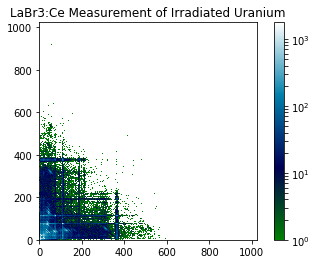

In [12]:
heatmap(rct12)

Another already available sklearn package randomly splits data into training and testing sets.

In [13]:
from sklearn import model_selection

In [14]:
 X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(
            X, y, test_size = 0.5)

Let's test a bunch of classification models on this dataset.

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import scikitplot as skplt

I wrote a script which trains, tests, and scores several classification models including: MLPClassifier, svm.SVC, and RandomForestClassifier. It returns the percentage of correct predictions made by the model.

In [16]:
def clf_model(X, y, model):
    if model == 'MLPClassifier':
        clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1)
    elif model == 'svm.SVC':
        clf = svm.SVC(decision_function_shape='ovo')
    elif model == 'RandomForestClassifier':
        clf = RandomForestClassifier()
    elif model == 'svm.LinearSVC':
        clf = svm.LinearSVC()
    else:
        print("Please specify a valid model (Current supported models are MLPClassifier, svm.SVC, svm.LinearSVC, and RandomForestClassifier")
    X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(
    X, y, test_size = 0.5)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    score=0
    for i in range(0,len(pred)):
        if pred[i] == y_test[i]:
            score+=1
        else:
            pass
    score = 100 * score / len(pred)
    return score, clf
    

In [17]:
scoreSVC, clfSVC = clf_model(X,y,'svm.SVC')
scoreSVC

/Users/adam/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


57.89473684210526

In [18]:
clfSVC.get_params(deep=True)

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovo',
 'degree': 3,
 'gamma': 'auto_deprecated',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [19]:
scoreLSVC, clfLSVC = clf_model(X, y, 'svm.LinearSVC')
scoreLSVC

/Users/adam/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


68.42105263157895

In [20]:
clfLSVC.get_params(deep=True)

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

Obviously these models could be refined by changing model parameters/settings.

In [21]:
scoreRF, clfRF = clf_model(X, y, 'RandomForestClassifier')
scoreRF

/Users/adam/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


42.10526315789474

In [22]:
clfRF.get_params(deep=True)

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Because we transformed the shape of the original data matrices, it will be necessary to perform reverse transformations to return the coincidence channels that each of these important features correspond to. Then, it will be necessary to apply an energy calibration to return the initial photon energies corresponding to each bin.

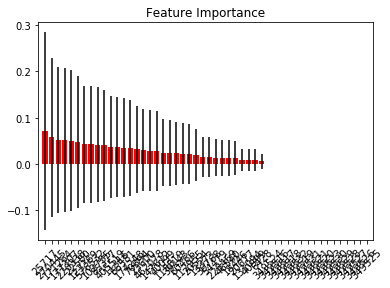

In [45]:
plotted_features = skplt.estimators.plot_feature_importances(clfRF, max_num_features=50, x_tick_rotation=45, text_fontsize='medium')

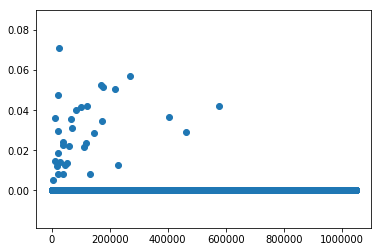

In [66]:
importances = clfRF.feature_importances_
labels = np.arange(1,1048577)
plt.scatter(labels,importances)

In [67]:
np.array(list(zip(labels, importances)))

array([[1.000000e+00, 0.000000e+00],
       [2.000000e+00, 0.000000e+00],
       [3.000000e+00, 0.000000e+00],
       ...,
       [1.048574e+06, 0.000000e+00],
       [1.048575e+06, 0.000000e+00],
       [1.048576e+06, 0.000000e+00]])

In [81]:
labels

array([      1,       2,       3, ..., 1048574, 1048575, 1048576])

I need to validate my features_finder(e) function to ensure that it is creating the correct coordinates for each data point. This function essentially undoes the np.reshape(order='C') function that is called near the beginning of this notebook. The easiest way to validate features_fuinder(e) would be to use it to create a heatmap of one row of the X[i] matrix and ensure that it looks like the standard coincidence heatmaps, with the preprocessing.scale renormalization applied.

In [80]:
labels = np.arange(1,1048577)
features = features_finder(labels)
features

array([[0.000e+00, 1.000e+00],
       [0.000e+00, 2.000e+00],
       [0.000e+00, 3.000e+00],
       ...,
       [1.023e+03, 1.022e+03],
       [1.023e+03, 1.023e+03],
       [1.024e+03, 0.000e+00]])

In [88]:
newheatmap = np.dstack((features[:,0],features[:,1],X[0,:]))
newheatmap

array([[[ 0.00000000e+00,  1.00000000e+00, -1.05145560e+00],
        [ 0.00000000e+00,  2.00000000e+00, -1.13696731e+00],
        [ 0.00000000e+00,  3.00000000e+00, -9.27556564e-01],
        ...,
        [ 1.02300000e+03,  1.02200000e+03,  0.00000000e+00],
        [ 1.02300000e+03,  1.02300000e+03,  0.00000000e+00],
        [ 1.02400000e+03,  0.00000000e+00,  0.00000000e+00]]])

In [93]:
newheatmap.size

3145728

In [115]:
(features[:,1])

array([1.000e+00, 2.000e+00, 3.000e+00, ..., 1.022e+03, 1.023e+03,
       0.000e+00])

In [116]:
(features[:,0])

array([   0.,    0.,    0., ..., 1023., 1023., 1024.])

In [117]:
(X[0,:])

array([-1.0514556 , -1.13696731, -0.92755656, ...,  0.        ,
        0.        ,  0.        ])

In [118]:
a = np.array([features[:,0]])
b = np.array([features[:,1]])
c = np.array([X[0,:]])
df = pd.DataFrame(np.array([a,b,c]).T)
df.columns = ['X_coor','Y_coor','Color_value']
df

ValueError: Must pass 2-d input

In [103]:
x = np.array(['a','b','c','a','b','c','a','b','c'])
y = np.array(['a','a','a','b','b','b','c','c','c'])
z = np.array([0.3,-0.3,1,0.5,-0.25,-1,0.25,-0.23,0.25])
df = pd.DataFrame.from_dict(np.array([x,y,z]).T)
df.columns = ['X_value','Y_value','Z_value']
df['Z_value'] = pd.to_numeric(df['Z_value'])
df

,X_value,Y_value,Z_value
0,a,a,0.30
1,b,a,-0.30
2,c,a,1.00
3,a,b,0.50
4,b,b,-0.25
5,c,b,-1.00
6,a,c,0.25
7,b,c,-0.23
8,c,c,0.25


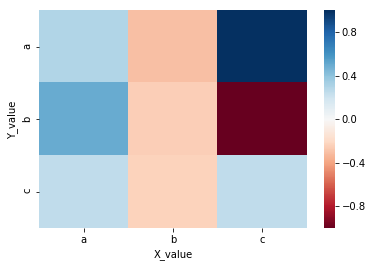

In [104]:
pivotted = df.pivot('Y_value','X_value','Z_value')
sns.heatmap(pivotted,cmap='RdBu')

In [102]:
df = pd.DataFrame.from_dict(np.array([newheatmap]).T)

ValueError: Must pass 2-d input

In [25]:
def features_finder(e):
    features = np.empty([len(e),2])
    for i in range (0,len(e)):
        features[i,0] = e[i] // 1024
        features[i,1] = e[i] % 1024
    return features

In [ ]:
def iter_features_finder(n_iter):
    labels = np.arange(1,1048577)
    importances = np.zeros(1048576)
    results = np.array(list(zip(labels, importances)))
    features = features_finder(labels)
    for i in range(n_iter):
        clfRF = clf_model(X, y, 'RandomForestClassifier')
        importances = clfRF.feature_importances_
        results[:,1] = results[:,1] + importances

In [28]:
f = np.array([25717, 270445, 171264, 177307, 220338, 22580, 123369, 576532, 102755, 85377])

In [29]:
features2 = features_finder(f)
features2

array([[ 25., 117.],
       [264., 109.],
       [167., 256.],
       [173., 155.],
       [215., 178.],
       [ 22.,  52.],
       [120., 489.],
       [563.,  20.],
       [100., 355.],
       [ 83., 385.]])

(0, 1024)

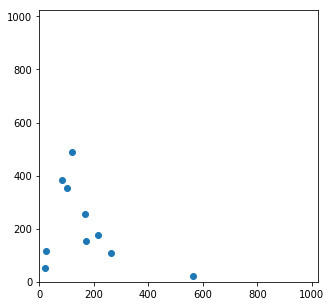

In [30]:
plt.figure(figsize=(5,5))
plt.scatter(x=features2[:,0],y=features2[:,1])
plt.xlim(0,1024)
plt.ylim(0,1024)

In [26]:
# e = np.array([185396, 233729, 93308, 185409, 26776, 168019, 217254, 200067, 183326, 160853, 85073, 98322, 64688, 134487, 419020, 296270, 33991, 209160, 88116, 241688])
e = np.array([185396, 233729, 93308, 185409, 26776, 168019, 217254, 200067, 183326, 160853])
features = features_finder(e)
features

array([[181.,  52.],
       [228., 257.],
       [ 91., 124.],
       [181.,  65.],
       [ 26., 152.],
       [164.,  83.],
       [212., 166.],
       [195., 387.],
       [179.,  30.],
       [157.,  85.]])

(0, 1024)

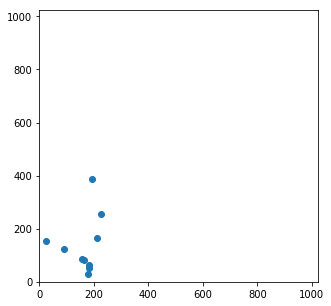

In [27]:
plt.figure(figsize=(5,5))
plt.scatter(x=features[:,0],y=features[:,1])
plt.xlim(0,1024)
plt.ylim(0,1024)

Maybe size each dot according to its feature importance weight